In [ ]:
#!pip install -Uqq nixtla

In [ ]:
import pandas as pd
from nixtla import NixtlaClient

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
)

In [ ]:
#df = pd.read_excel("/content/Base de datos Final 2024.xlsx")
#future_ex_vars_df = pd.read_excel("/content/variables_externas_2025.xlsx")

df = pd.read_csv("/content/Base de datos Final 2024 nixtla sin outliers.csv")
future_ex_vars_df = pd.read_csv("/content/variables_externas_2025.csv")

In [ ]:
df['unique_id'] = 'A1'
df.rename(columns={'fecha': 'ds'}, inplace=True)
df.rename(columns={'Venta_autos': 'y'}, inplace=True)

future_ex_vars_df['unique_id'] = 'A1'
future_ex_vars_df.rename(columns={'fecha': 'ds'}, inplace=True)

In [ ]:
df

,unique_id,ds,y,Imacec,Importaciones,Tipo_de_cambio,Percepcion_personal,TPM,Avisos_trabajo,M1,Morosidad,Tipo_de_cambio_3M,TPM_6M,M1_6M
0,A1,2017-01-01,27308,92.487586,21284.0,647.85,36.720000,3.404762,100.00,29513.82507,2.123155,652.40,3.500000,27284.78171
1,A1,2017-02-01,23805,89.066912,20970.0,650.18,36.550000,3.250000,90.62,29083.71411,2.183126,675.49,3.500000,26967.87469
2,A1,2017-03-01,29639,100.353074,30088.0,659.21,34.979805,3.130435,98.79,29066.51425,2.131865,669.29,3.500000,27245.26280
3,A1,2017-04-01,24675,95.345691,26666.0,666.43,36.954524,2.875000,87.05,29863.70340,2.098079,647.85,3.500000,27120.06438
4,A1,2017-05-01,29910,96.953323,26314.0,672.85,40.693365,2.647727,92.17,30135.74454,2.085406,650.18,3.500000,27870.87786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,A1,2024-08-01,28335,109.512246,7167.0,912.77,35.980927,5.750000,59.54,55749.98523,2.317313,918.28,7.250000,56326.24844
92,A1,2024-09-01,25765,105.270940,8457.0,898.60,33.389247,5.527778,54.59,56555.07028,2.449465,940.45,7.250000,56128.89899
93,A1,2024-10-01,27629,110.577523,10044.0,961.12,32.114522,5.397727,69.76,56019.81694,2.356230,942.50,6.568182,56689.73916
94,A1,2024-11-01,25103,114.452156,7694.0,973.15,34.304975,5.250000,66.30,56772.08694,2.350593,912.77,6.357143,56157.70711


In [ ]:
future_ex_vars_df

,unique_id,ds,Imacec,Importaciones,Tipo_de_cambio,Percepcion_personal,TPM,Avisos_trabajo,M1,Morosidad,Tipo_de_cambio_3M,TPM_6M,M1_6M
0,A1,2025-01-01,108,6757,1000,33,5,74.1,56300,2.3,1000,5,56300
1,A1,2025-02-01,108,5067,1000,33,5,67.3,56300,2.3,1000,5,56300
2,A1,2025-03-01,108,5532,1000,33,5,65.1,56300,2.3,1000,5,56300
3,A1,2025-04-01,108,6567,1000,33,5,72.4,56300,2.3,1000,5,56300
4,A1,2025-05-01,108,6085,1000,33,5,67.0,56300,2.3,1000,5,56300
5,A1,2025-06-01,108,34894,1000,33,5,58.8,56300,2.3,1000,5,56300
6,A1,2025-07-01,108,7894,1000,33,5,63.3,56300,2.3,1000,5,56300
7,A1,2025-08-01,108,7167,1000,33,5,59.5,56300,2.3,1000,5,56300
8,A1,2025-09-01,108,8457,1000,33,5,54.6,56300,2.3,1000,5,56300
9,A1,2025-10-01,108,10044,1000,33,5,69.8,56300,2.3,1000,5,56300


In [ ]:
timegpt_fcst_ex_vars_df = nixtla_client.forecast(df=df, X_df=future_ex_vars_df, h=12, level=[50, 80], finetune_steps=1, finetune_depth=4, feature_contributions=True)
timegpt_fcst_ex_vars_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-50,TimeGPT-hi-80,TimeGPT-lo-50,TimeGPT-lo-80
0,A1,2025-01-01,26693.465,28381.275,29194.400,25005.654,24192.5300
1,A1,2025-02-01,25529.582,29142.504,31612.438,21916.660,19446.7270
2,A1,2025-03-01,25115.426,30194.137,32536.285,20036.715,17694.5660
3,A1,2025-04-01,25504.615,28197.791,35509.207,22811.440,15500.0205
4,A1,2025-05-01,24370.465,31030.312,33966.062,17710.620,14774.8660


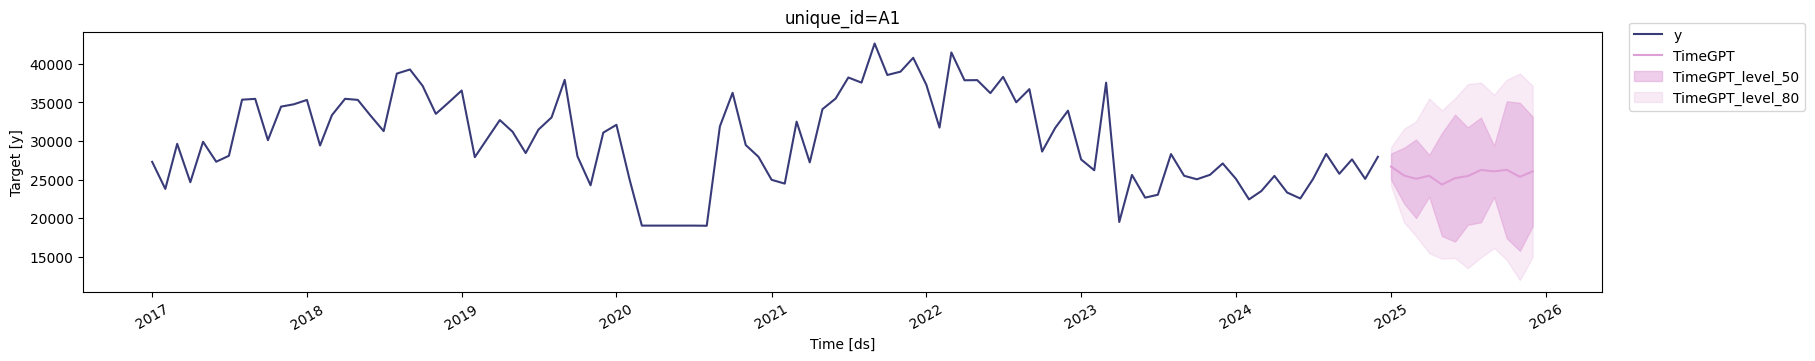

In [ ]:
nixtla_client.plot(
    df[['unique_id', 'ds', 'y']],
    timegpt_fcst_ex_vars_df,
    max_insample_length=365,
    level=[50, 80],
)

<Axes: ylabel='features'>

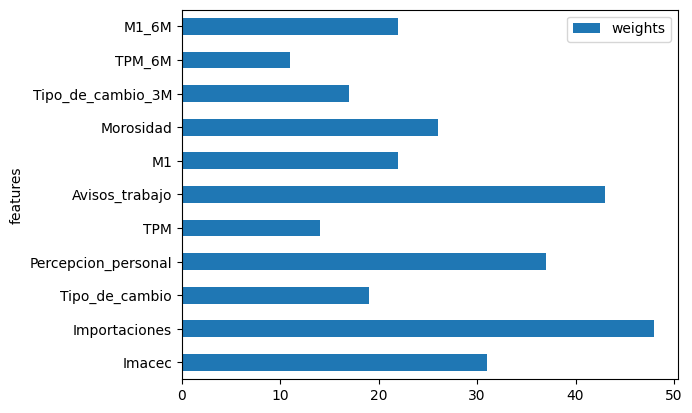

In [ ]:
nixtla_client.weights_x.plot.barh(x='features', y='weights')

In [ ]:
shap_df = nixtla_client.feature_contributions
shap_df = shap_df.query("unique_id == unique_id")
shap_df.head()

,unique_id,ds,TimeGPT,Imacec,Importaciones,Tipo_de_cambio,Percepcion_personal,TPM,Avisos_trabajo,M1,Morosidad,Tipo_de_cambio_3M,TPM_6M,M1_6M,base_value
0,A1,2025-01-01,26693.465,443.58035,-1242.3015,415.25040,79.48680,-299.38327,-2271.2466,-444.25012,-1622.0597,160.35794,-4.83465,696.1416,30782.723
1,A1,2025-02-01,25529.582,430.77820,-1242.3015,361.23605,41.65152,-256.60776,-3550.9670,-478.72970,-1693.7582,160.35794,84.73214,696.1416,30977.049
2,A1,2025-03-01,25115.426,430.77820,-1242.3015,361.23605,41.65152,-256.60776,-3550.9670,-478.72970,-1693.7582,160.35794,84.73214,696.1416,30562.893
3,A1,2025-04-01,25504.615,443.58035,-1242.3015,415.25040,79.48680,-299.38327,-2454.4758,-444.25012,-1693.7582,160.35794,-4.83465,696.1416,29848.803
4,A1,2025-05-01,24370.465,430.77820,-1242.3015,361.23605,41.65152,-256.60776,-3550.9670,-478.72970,-1693.7582,160.35794,84.73214,696.1416,29817.932


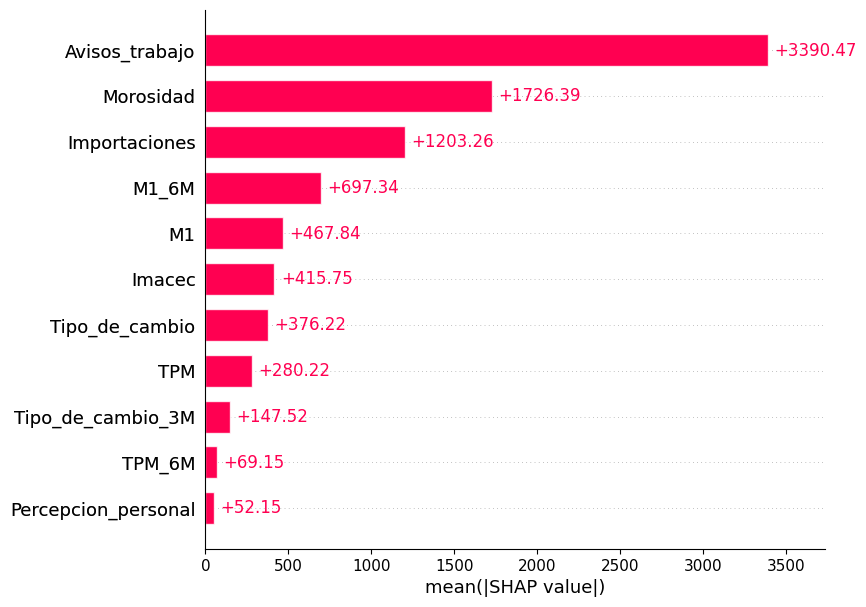

In [ ]:
import shap
import matplotlib.pyplot as plt

shap_columns = shap_df.columns.difference(['unique_id', 'ds', 'TimeGPT', 'base_value'])
shap_values = shap_df[shap_columns].values  # SHAP values matrix
base_values = shap_df['base_value'].values  # Extract base values
features = shap_columns  # Feature names

# Create a SHAP values object
shap_obj = shap.Explanation(values=shap_values, base_values=base_values, feature_names=features)

# Plot the bar plot for SHAP values
shap.plots.bar(shap_obj, max_display=len(features), show=False)
#plt.title(f'SHAP values for {unique_id}')
plt.show()

In [ ]:
timegpt_fcst_ex_vars_df.to_excel('timegpt_fcst_ex_vars_df.xlsx', index=False)

In [ ]:
shap_df.to_excel('shap_df.xlsx', index=False)